<a href="https://colab.research.google.com/github/HwangSiyeon/ESAA_homework/blob/main/ESAA_09_25_Do_It_Pandas(p_241_271).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# datetime 오브젝트
datetime 오브젝트는 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 파이썬 라이브러리입니다. datetime라이브러리에는 날짜를 처리하는 date오브젝트, 시간을 처리하는 time오브젝트, 날짜와 시간을 모두 처리하는 datetime오브젝트가 포함되어 있습니다.

### datetime 오브젝트 사용하기

In [8]:
from datetime import datetime   # datetime 오브젝트를 사용하기 위해 datetime 라이브러리를 불러옵니다.

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
now1= datetime.now()  # now 메서드를 사용하면 다음과 같이 현재 시간을 출력할 수 있습니다.
print(now1)

2023-09-28 11:19:11.836947


In [ ]:
now2=datetime.today() # today 메서드를 사용하면 다음과 같이 현재 시간을 출력할 수 있습니다.
print(now2)

2023-09-26 12:49:19.497632


In [ ]:
t1 = datetime.now()
t2 = datetime(1970,1,1)
t3 = datetime(1970,12,12,13,24,34)

print(t1)
print(t2)
print(t3)

2023-09-26 12:52:42.797563
1970-01-01 00:00:00
1970-12-12 13:24:34


In [ ]:
# datetime 오브젝트를 사용하는 이유 중 하나는 시간 계산을 할 수 있다는 점입니다. 다음은 두 datetime 오브젝트의 차이를 구한 것입니다.
diff1=t1-t2
print(diff1)
print(type(diff1))

19626 days, 12:52:42.797563
<class 'datetime.timedelta'>


In [ ]:
diff2=t2-t1
print(diff2)
print(type(diff2))

-19627 days, 11:07:17.202437
<class 'datetime.timedelta'>


### datetime 오브젝트로 변환하기 - to_datetime 메서드
경우에 따라서는 시계열 데이터를 문자열로 저장해야 할 때도 있습니다. 하지만, 문자열은 시간 계산을 할 수 없기 떄문에 datetime 오브젝트로 변환해 주어야 합니다. 이번에는 to_datetime 메서드를 사용하여 datetime 오브젝트로 변환하는 방법에 대해 알아보겠습니다.

In [7]:
# 문자열을 datetime 오브젝트로 변환하기
import pandas as pd
import os
ebola = pd.read_csv('/content/drive/MyDrive/ESAA_homework/country_timeseries.csv')

In [8]:
print(ebola.info()) # 문자열로 저장된 Date열이 있음을 확인할 수 있다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [ ]:
# to_datetime 메서드를 사용해 date열의 자료형을 datetime 오브젝트로 변환할 수 있다.
ebola["date_dt"]= pd.to_datetime(ebola["Date"])
print(ebola.info())              # 마지막 열에 data 타입이 datetime인 것을 확인 가능하다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [ ]:
# to_datetime 메서드에서는 시간형식 지정자(%d, %m, %y)와 기호(/,-)를 적절히 조합하여 format 인자에 전달하면 그 형식에 맞게 정리된 datetime 오브젝트를 얻을 수 있다.
# 여기서 format 은 받아들이는 형식이다
test_df1 = pd.DataFrame({'order_day':['01/01/15','02/01/15','03/01/15']}) # 문자열으로 이루어진 날짜 형식1

test_df1['date_df1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_df2'] = pd.to_datetime(test_df1["order_day"], format='%m/%d/%y')
test_df1['date_df3'] = pd.to_datetime(test_df1["order_day"], format='%y/%m/%d')

print(test_df1)

  order_day   date_df1   date_df2   date_df3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [ ]:
test_df2 = pd.DataFrame({'order_day':['01-01-15','02-01-15','03-01-15']}) # 문자열으로 이루어진 날짜 형식2

test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')
print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


# 시간 형식 지정자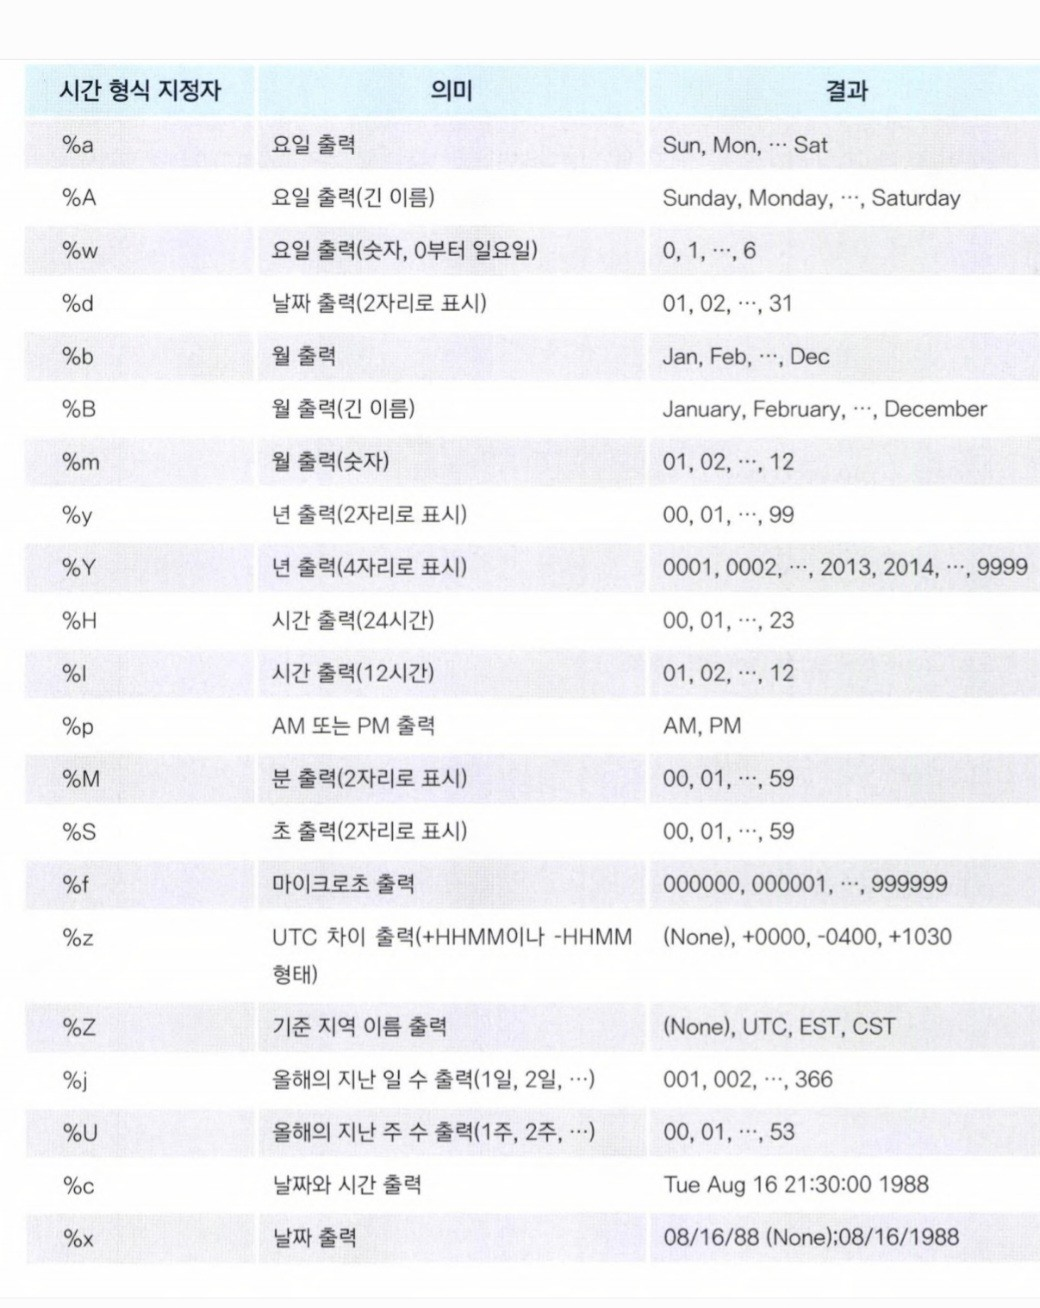

### 시계열 데이터를 구분해서 추출하고 싶을 때
now 메서드로 얻은 현재시간 데이터는 아주 정밀한 단위까지 시간을 표현한다. 하지만 원하는 시계열 데이터가 연월일뿐이면 now메소드로 얻은 시계열 데이터를 잘라내야 한다. 다음은 strtime 메서드와 시간 형식 지정자를 이용하여 시계열 데이터를 잘라낸 것입니다.

In [ ]:
now = datetime.now()
print(now)

2023-09-26 13:56:20.009329


In [ ]:
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2023-09-26


In [ ]:
nowTime = now.strftime('%H:%M:%S')
print(nowTime)

13:56:20


### datetime 오브젝트로 변환하기 - read_csv 메서드
datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기

In [ ]:
# 애초에 불러올 때 parse_dates 인자에 datetime 오브젝트로 변환하고자 하는 열의 이름을 전달하여 데이터 집합을 불러온 것이다.
ebola1 = pd.read_csv('./country_timeseries.csv',parse_dates=['Date'])
print(ebola1.info())  # Date열이 문자열이 아니라 datetime 오브젝트라는 것을 확인할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

### datetime 오브젝트에서 날짜 정보 추출하기

In [ ]:
date_series = pd.Series(['2018-05-16','2018-05-17','2018-05-18'])
d1= pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [ ]:
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


### dt 접근자 사용하기

In [ ]:
ebola = pd.read_csv('./country_timeseries.csv')
ebola["date_dt"]= pd.to_datetime(ebola["Date"])
print(ebola[["Date","date_dt"]].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [ ]:
# 이 과정은 인덱스로 접급해야 하므로 불편하다.
print(ebola["date_dt"][3].year)
print(ebola["date_dt"][3].month)
print(ebola["date_dt"][3].day)

2015
1
2


In [ ]:
# 다음은 date_dt열에 한 번에 접근한 다음 year 속성을 이용하여 연도값을 추출한 것이다. 이렇게 뽑아낸 값들은 datetime과 달리 정수형이다.
ebola["year"] = ebola["date_dt"].dt.year
print(ebola[['Date','date_dt','year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [ ]:
ebola["month"], ebola["day"] = (ebola["date_dt"].dt.month, ebola["date_dt"].dt.day )
print(ebola[['Date','date_dt','year','month','day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [ ]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# 사례별 시계열 데이터 계산하기

In [ ]:
# 에볼라 최초 발병일 계산하기
print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [ ]:
print(ebola["date_dt"].min())  # 에볼라의 최초 발병일을 min()메서드를 이용해서 찾을 수 있다
print(type(ebola["date_dt"].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
# 에볼라의 최초 발병일을 알아냈으므로 Date열에서 에볼라의 최초 발병일을 빼면 에볼라의 진행 정도를 알 수 있다.
ebola["outbreak_d"] = ebola["date_dt"] - ebola["date_dt"].min()
print(ebola[["Date","Day","outbreak_d"]].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


In [12]:
# 파산한 은행의 개수 계산하기
banks = pd.read_csv("/content/drive/MyDrive/ESAA_homework/banklist.csv")
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


In [14]:
# Closing Date, Updated Date열의 데이터 자료형은 문자열이다.
# 다음은 read_csv메서드의 parse_dates 속성을 이용하여 문자열로 저장된 두 열을 datetime 오브젝트로 변환하여 불러온 것이다.
banks_no_dates = pd.read_csv("/content/drive/MyDrive/ESAA_homework/banklist.csv")
print(banks_no_dates.info())

banks = pd.read_csv("/content/drive/MyDrive/ESAA_homework/banklist.csv", parse_dates = [5,6]) # parse_date할 column명 대신 index로 나타내도 된다.
print(banks.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null 

In [15]:
# dt 접근자와 year,quarter속성을 이용해 은행이 파산한 분기를 알 수 있다.
banks["closing_quarter"], banks["closing_year"] = (banks["Closing Date"].dt.quarter, banks["Closing Date"].dt.year)
print(banks.iloc[:,-4:].head())

  Closing Date Updated Date  closing_quarter  closing_year
0   2017-12-15   2017-12-20                4          2017
1   2017-10-13   2017-10-20                4          2017
2   2017-05-26   2017-07-26                2          2017
3   2017-05-05   2017-07-26                2          2017
4   2017-04-28   2017-12-05                2          2017


In [17]:
# 연도별로 파산한 은행 구하기 - groupby 메서드 이용
closing_year = banks.groupby(["closing_year"]).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [20]:
# 각 연도별, 분기별 파산은행 수
closing_year_q = banks.groupby(["closing_year","closing_quarter"]).size()
closing_year_q

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

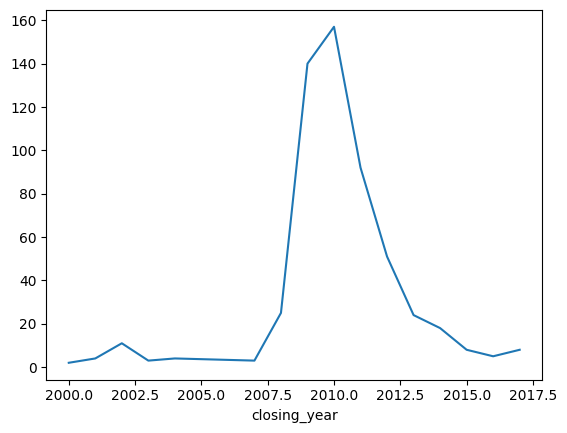

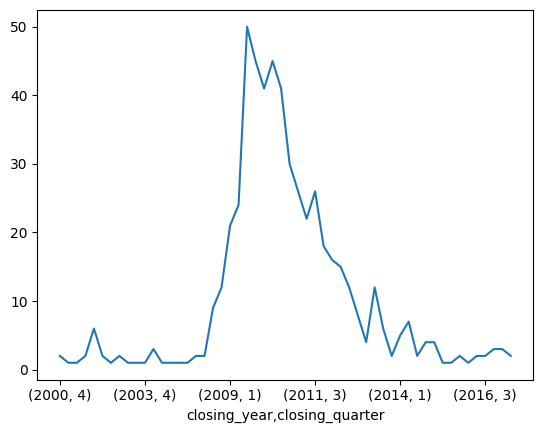

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax= closing_year.plot()
plt.show()

fig,ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

In [49]:
# 테슬라 주식 데이터로 시간 계산하가
pd.core.common.is_list_like=pd.api.types.is_list_like
import pandas_datareader as pdr
#tesla = pdr.get_data_quandl("TSLA",api_key="idVKxzmY_5e62dUAT_aD") #idVKxzmY_5e62dUAT_aD는 www.quandl.com에서 얻은 키이다
#tesla.to_csv('./drive/MyDrive/tesla_stock_quandl.csv') # 데이터프레임을 폴더 안에 저장
# 위 코드가 불러와지지 않아 대체 데이터 사용
tesla = pd.read_csv('./drive/MyDrive/tesla_stock_quandl.csv')
print(tesla.head())

         Date    Open    High     Low   Close      Volume  ExDividend  \
0  2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
1  2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2  2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
3  2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
4  2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

   SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
0         1.0   304.00   304.27  277.18    279.18  13696168.0  
1         1.0   307.34   307.59  291.36    304.18   8324639.0  
2         1.0   311.25   311.61  300.45    301.54   6600538.0  
3         1.0   313.89   318.82  308.18    309.10   4914307.0  
4         1.0   310.25   322.44  310.19    316.53   5927881.0  


In [54]:
tesla = pd.read_csv("./drive/MyDrive/tesla_stock_quandl.csv", parse_dates=[0])
print(tesla.info())
# 0번째 row를 datetime형식으로 불러온다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1949 non-null   datetime64[ns]
 1   Open        1949 non-null   float64       
 2   High        1949 non-null   float64       
 3   Low         1949 non-null   float64       
 4   Close       1949 non-null   float64       
 5   Volume      1949 non-null   float64       
 6   ExDividend  1949 non-null   float64       
 7   SplitRatio  1949 non-null   float64       
 8   AdjOpen     1949 non-null   float64       
 9   AdjHigh     1949 non-null   float64       
 10  AdjLow      1949 non-null   float64       
 11  AdjClose    1949 non-null   float64       
 12  AdjVolume   1949 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 198.1 KB
None


In [55]:
print(tesla.loc[(tesla.Date.dt.year==2010)&(tesla.Date.dt.month==6)])
# 2010년 6월 데이터만 추출한다

           Date   Open     High    Low  Close      Volume  ExDividend  \
1947 2010-06-30  25.79  30.4192  23.30  23.83  17187100.0         0.0   
1948 2010-06-29  19.00  25.0000  17.54  23.89  18766300.0         0.0   

      SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
1947         1.0    25.79  30.4192   23.30     23.83  17187100.0  
1948         1.0    19.00  25.0000   17.54     23.89  18766300.0  


# datetime 오브젝트와 인덱스 - DatetimeIndex

datetime오브젝트를 데이터프레임의 인덱스로 설정하면 원하는 시간의 데이터를 바로 추출할 수 있다.

In [56]:
# datetime 오브젝트를 인덱스로 설정해 데이터 추출하기
tesla.index = tesla["Date"]
print(tesla.index)

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)


In [58]:
print(tesla["2015"].iloc[:5,:5])
# datetime 오브젝트를 인덱스로 지정하면 원하는 시간의 데이터를 바로 추출할 수 있다. 위는 2015년의 데이터를 추출한 것이다.

                 Date    Open     High       Low   Close
Date                                                    
2015-12-31 2015-12-31  238.51  243.450  238.3700  240.01
2015-12-30 2015-12-30  236.60  243.634  235.6707  238.09
2015-12-29 2015-12-29  230.06  237.720  229.5470  237.19
2015-12-28 2015-12-28  231.49  231.980  225.5400  228.95
2015-12-24 2015-12-24  230.56  231.880  228.2800  230.57


<ipython-input-58-eb2e447d18a6>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(tesla["2015"].iloc[:5,:5])


In [61]:
print(tesla["2010-06"].iloc[:,:5])
# 위는 2010년 5월의 data를 추츨한 것이다

                 Date   Open     High    Low  Close
Date                                               
2010-06-30 2010-06-30  25.79  30.4192  23.30  23.83
2010-06-29 2010-06-29  19.00  25.0000  17.54  23.89


<ipython-input-61-a61dcfd6defc>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(tesla["2010-06"].iloc[:,:5])


# 시간 간격과 인덱스 - TImedeltaIndex
시간 간격을 인덱스로 지정하여 데이터를 추출한다.

In [63]:
# 시간 간격을 인덱스로 지정해 데이터 추출하기
tesla["ref_date"] = tesla["Date"]-tesla["Date"].min()
print(tesla.head())
# Date 열에서 Date열의 최솟값을 뺀 다음 ref_date 열로 추가

                 Date    Open    High     Low   Close      Volume  ExDividend  \
Date                                                                            
2018-03-27 2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
2018-03-26 2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2018-03-23 2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
2018-03-22 2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
2018-03-21 2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  \
Date                                                                     
2018-03-27         1.0   304.00   304.27  277.18    279.18  13696168.0   
2018-03-26         1.0   307.34   307.59  291.36    304.18   8324639.0   
2018-03-23         1.0   311.25   311.61  300.45    301.54   6600538.0   
2018-03-22         1.0   313.89   318.82  308.18    309.10   4

In [66]:
tesla.index = tesla["ref_date"]
print(tesla.iloc[:5,:5])
# ref_date 열을 인덱스로 지정한다.

                Date    Open    High     Low   Close
ref_date                                            
2828 days 2018-03-27  304.00  304.27  277.18  279.18
2827 days 2018-03-26  307.34  307.59  291.36  304.18
2824 days 2018-03-23  311.25  311.61  300.45  301.54
2823 days 2018-03-22  313.89  318.82  308.18  309.10
2822 days 2018-03-21  310.25  322.44  310.19  316.53


In [65]:
print(tesla["5 days":].iloc[:5,:5])
# 이제 시간 간격을 이용하여 데이터를 추출할 수 있다. 여기서 4 days는 데이터가 없어 출력X

               Date   Open     High    Low  Close
ref_date                                         
3 days   2010-07-02  23.00  23.1000  18.71  19.20
2 days   2010-07-01  25.00  25.9200  20.27  21.96
1 days   2010-06-30  25.79  30.4192  23.30  23.83
0 days   2010-06-29  19.00  25.0000  17.54  23.89


# 시간 범위와 인덱스
가끔씩은 데이터를 수집하지 못한 날도 존재한다. 특정일이 누락된 데이터도 포함시켜 데이터를 살펴보기 위해 임의로 시간 범위를 생성하여 인덱스로 지정하는 방법을 쓸 수 있다.

In [72]:
# 시간 범위 생성해 인덱스로 지정하기
ebola = pd.read_csv("./drive/MyDrive/ESAA_homework/country_timeseries.csv", parse_dates = [0])
print(ebola.iloc[:5,:5])
print(ebola.iloc[:-5,:5])
# 데이터에 누락된 일자가 있음을 알 수 있다.

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0
          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0   2015-01-05  289        2776.0            NaN            10030.0
1   2015-01-04  288        2775.0            NaN             9780.0
2   2015-01-03  287        2769.0         8166.0             9722.0
3   2015-01-02  286           NaN         8157.0                NaN
4   2014-12-31  284        2730.0         8115.0             9633.0
..         ...  ...           ...            ...                ...
112 2014-04-04   13         143.0           18.0                2.0
113 2014-04-01   10         127.0            8.0            

In [73]:
# date_range 메서드를 사용하여 시간 인덱스를 생성한다
head_range = pd.date_range(start='2014-12-31',end="2015-01-05")
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [76]:
# 원본 데이터를 손상시키는 것을 방지하기 위해 evola 데이터프레임의 앞쪽 5개의 데이터를 추출하여 새로운 데이터프레임을 만든 것이다.
# 반드시 Date열을 인덱스로 지정한 후 위에서 생성한 시간 범위를 인덱스로 지정해야 한다.
ebola_5 = ebola.head()
ebola_5.index = ebola_5["Date"]
ebola_5.reindex(head_range)
print(ebola_5.iloc[:5,:5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


# 시간 범위의 주기 설정하기
시간 범위를 인덱스로 지정하면 DatetimeIndex 자료형이 만들어진다. DatetimeIndex에는 freq속성이 포함되어 있다. freq속성값을 지정하면 시간 간격을 조절하여 DatetimeIndex를 만들 수 있다. 아래에 freq 속성값으로 사용할 수 있는 시간 주기를 표로 정리했다.
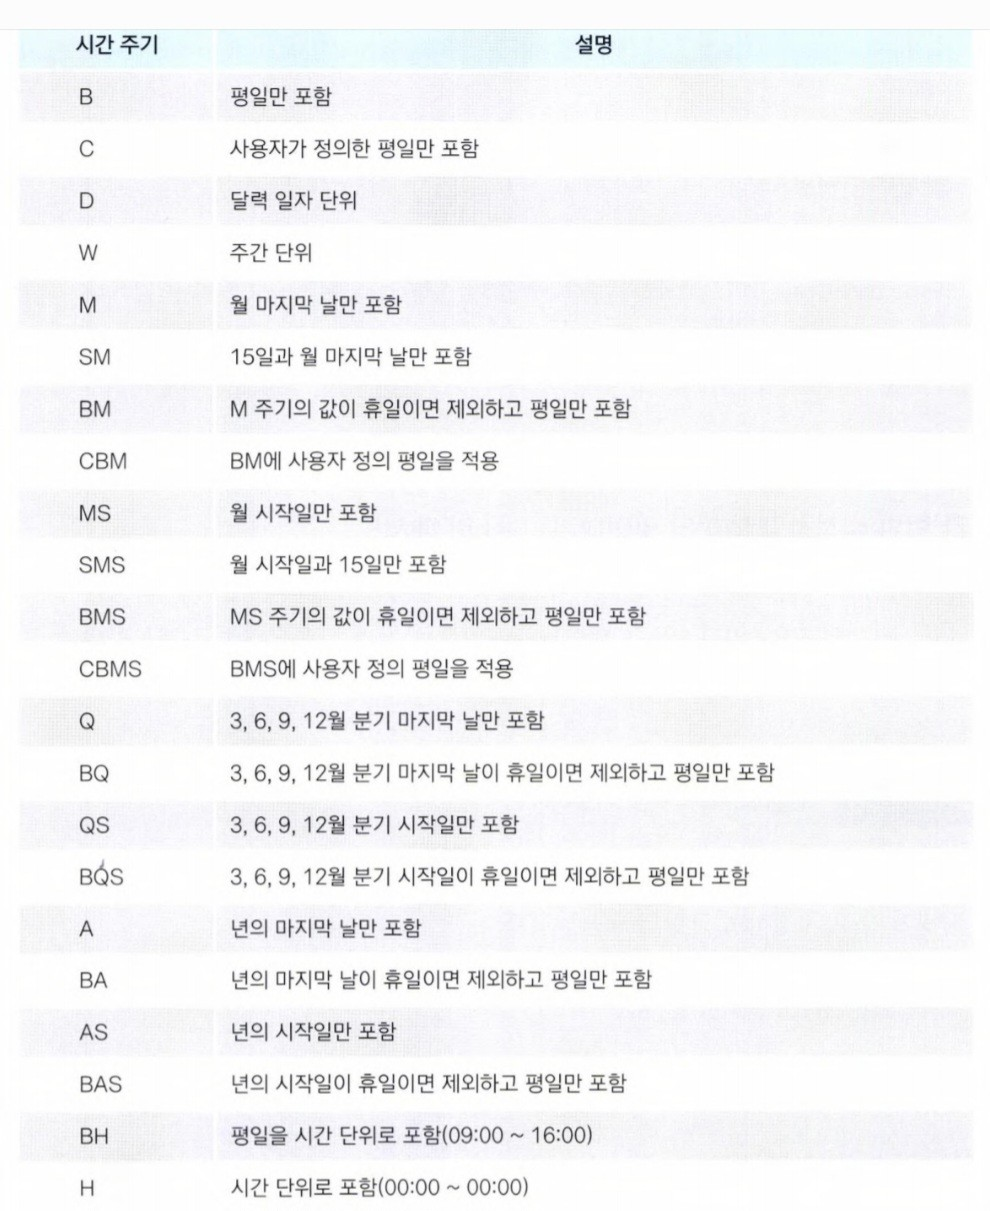

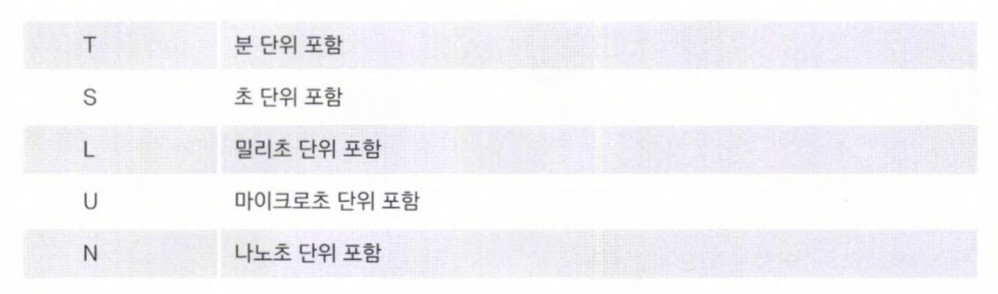

In [77]:
# freq를 B로 설정하여 평일만 포함(freq=B)시긴 DatetimeIndex를 만들었다.
print(pd.date_range('2017-01-01','2017-01-07',freq='B'))

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')


# 시간 범위 수정하고 데이터 밀어내기 - shift 메서드


<function matplotlib.pyplot.show(close=None, block=None)>

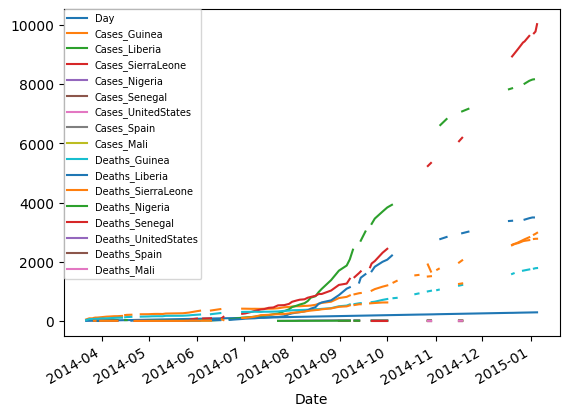

In [78]:
# 나라별 에볼라의 확산 속도 비교하기
import matplotlib.pyplot as plt

ebola.index = ebola['Date']

fig, ax = plt.subplots()
ax = ebola.iloc[0:,1:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show
# 이 그래프는 발병일이 달라 그래프가 그려지기 시작하는 지점도 다르다.
#각 나라의 발병일을 처음 에볼라가 발병한 Guinea와 동일한 위치로 옮겨야 한다

In [98]:
ebola_sub = ebola[['Day','Cases_Guinea','Cases_Liberia']]
print(ebola_sub.tail(10))
ebola = pd.read_csv("./drive/MyDrive/ESAA_homework/country_timeseries.csv", parse_dates = ["Date"])
print(ebola.head().iloc[:,:5])
print(ebola.tail().iloc[:,:5])

     Day  Cases_Guinea  Cases_Liberia
112   13         143.0           18.0
113   10         127.0            8.0
114    9         122.0            8.0
115    7         112.0            7.0
116    6         112.0            3.0
117    5         103.0            8.0
118    4          86.0            NaN
119    3          86.0            NaN
120    2          86.0            NaN
121    0          49.0            NaN
        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0
          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN  

In [102]:
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(),ebola.index.max())
# Date 열을 인덱스로 지정한 다음 ebola 데이터프레임의 Date열의 최댓값과 최솟값으로 시간범위를 생성하여 new_idx에 저당
# 날짜가 없었던 데이터의 index를 생성

In [103]:
print(new_idx)
new_idx = reversed(new_idx)
# new_idx는 시간 순서가 ebola 데이터와 반대로 되어있다. 시간순서를 맞추가 위해 reversed 메서드 이용

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [104]:
ebola = ebola.reindex(new_idx)
print(ebola.head().iloc[:,:5])
print(ebola.tail().iloc[:,:5])
# 기존 데이터 프레임에 없던 날짜도 추가됨.

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN
                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 

In [105]:
# 각 나라의 에볼라 발병일 옮기기
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)
# last_valid는 유효한 값이 있는 마지막 인덱스를 반환한다

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [106]:
first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)
# first_valid는 유효한 값이 있는 첫 인덱스를 반환한다

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


In [107]:
# 각 나라의 에볼라 발병일을 동일한 출발선으로 옮기려면 에볼라가 가장 처음 발병한 날에서 각 나라의 에볼라 발병일을 뺀 만큼만 옮기면 된다.
earliest_date = ebola.index.min()
print(earliest_date)

2014-03-22 00:00:00


In [110]:
shift_values = last_valid - earliest_date
print(shift_values)

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [111]:
# 각 나라의 에볼라 발병일을 shift 메서드를 사용하여 shift_values값만큼 옮긴다.
# shift 메서드는 인잣값만큼 데이터를 밀어내는 메서드이다.
# column(해당국가)별로 에볼라 최초시작일만큼 데이터가 column 윗부분으로 끌려올라간다고 보면 된다.
ebola_dict = {}
for idx, col in enumerate(ebola):
  d = shift_values[idx].days
  shifted = ebola[col].shift(d)
  ebola_dict[col] = shifted    # 해당 column명의 key에 shifted된 value를 넣는다

In [112]:
# 데이터프레임으로 만들기
ebola_shift = pd.DataFrame(ebola_dict)
print(ebola_shift.tail())

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

In [90]:
# 필요 없는 열 삭제
ebola_shift.index = ebola_shift['Day']  # "국가별 발병시작한지 x일" 을 index가 되게 한다.
ebola_shift = ebola_shift.drop(['Date','Day'],axis=1) # 해당 열은 필요 없으므로 삭제
print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

<function matplotlib.pyplot.show(close=None, block=None)>

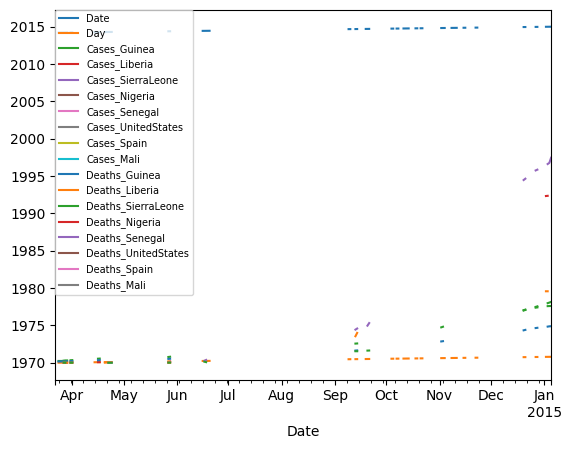

In [91]:
# 그래프 다시 그리기
fig, ax = plt.subplots()
ax = ebola.iloc[:,:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show